In [20]:
#import the packages to work on data
import numpy as np
import pandas as pd

In [21]:
#import the data
column_names=['User_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=column_names)

In [22]:
#checking the head of the data
df.head()

,User_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [23]:
#import the title of the movies
movie_title= pd.read_csv('Movie_Id_Titles')
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [24]:
#merging the info and movie names
df=pd.merge(df,movie_title,on='item_id')

In [25]:
df.head()

,User_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [26]:
#importing packages to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
#grouping and sorting the data according to the rating
df.groupby('title')['rating'].count().sort_values(ascending=False).head

<bound method NDFrame.head of title
Star Wars (1977)                                     584
Contact (1997)                                       509
Fargo (1996)                                         508
Return of the Jedi (1983)                            507
Liar Liar (1997)                                     485
English Patient, The (1996)                          481
Scream (1996)                                        478
Toy Story (1995)                                     452
Air Force One (1997)                                 431
Independence Day (ID4) (1996)                        429
Raiders of the Lost Ark (1981)                       420
Godfather, The (1972)                                413
Pulp Fiction (1994)                                  394
Twelve Monkeys (1995)                                392
Silence of the Lambs, The (1991)                     390
Jerry Maguire (1996)                                 384
Chasing Amy (1997)                                  

In [28]:
#taking mean of the ratings of as each movie
ratings= pd.DataFrame(df.groupby('title')['rating'].mean())

In [29]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [30]:
#checking and storing the number of ratings given by the user
ratings['num of rating']=pd.DataFrame(df.groupby('title')['rating'].count())

In [31]:
ratings.head()

,rating,num of rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


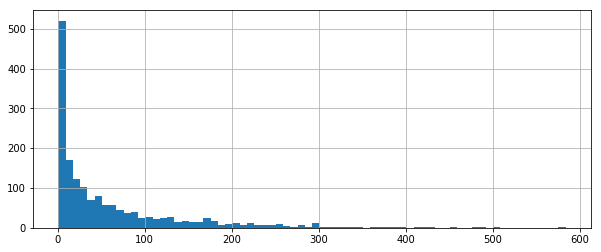

In [32]:
#visualizing the data
plt.figure(figsize=(10,4))
ratings['num of rating'].hist(bins=70)

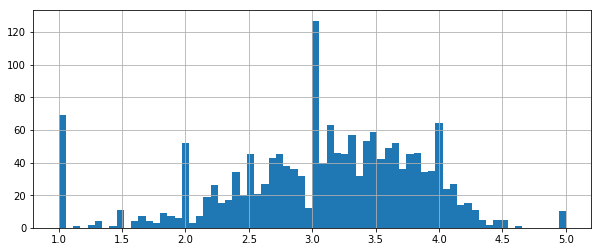

In [34]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

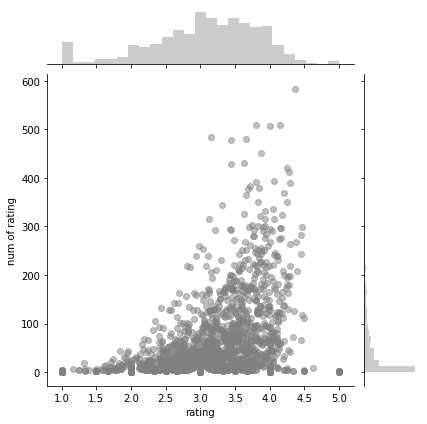

In [39]:
sns.jointplot(x='rating',y='num of rating',data=ratings,alpha=0.5,color='grey')

In [41]:
#getting the rating given by a particular user to the number of movies
movie_mat=df.pivot_table(index='User_id',columns='title',values='rating')

In [42]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
User_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
#sorting the rating
ratings.sort_values('num of rating',ascending=False).head(10)

,rating,num of rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [46]:
#the name of the variables says every thing
starwars_user_ratings=movie_mat['Star Wars (1977)']
liarliar_user_rating=movie_mat['Liar Liar (1997)']
starwars_user_ratings.head(10)

User_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
6    4.0
7    5.0
8    5.0
9    5.0
Name: Star Wars (1977), dtype: float64

In [47]:
similar_to_starwars = movie_mat.corrwith(starwars_user_ratings)
similar_to_liarliar=movie_mat.corrwith(liarliar_user_rating)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\hp\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [49]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [51]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [53]:
corr_starwars= corr_starwars.join(ratings['num of rating'])
corr_starwars.head()

,Correlation,num of rating
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [55]:
#separating the movies which have being rated more than 100 times
corr_starwars[corr_starwars['num of rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of rating
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [56]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar=corr_liarliar.join(ratings['num of rating'])
corr_liarliar[corr_liarliar['num of rating']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of rating
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
